**Dataset Creation**

---




In [1]:
import pandas as pd
import os

folder = "/content"

masterdf = pd.DataFrame();

for f in os.listdir(folder):
  if f.endswith(".csv"):
    path = os.path.join(folder, f)
    df = pd.read_csv(path)

    df_sorted = df.sort_values(by=df.columns[0], ascending=True)

    if masterdf.empty:
      masterdf = df_sorted

    else:
      df_sorted = df_sorted.drop(df_sorted.columns[0], axis=1)
      masterdf = pd.concat([masterdf, df_sorted], axis=1)

masterdf.to_csv("master.csv", index=False)


In [2]:
masterdf

,Name,Male Urban Sewage,Female Urban Sewage,Total Urban Sewage,Male Rural Sewage,Female Rural Sewage,Total Rural Sewage,Male Sewage,Female Sewage,Total Sewage,...,Total Rural Immunization Index,Male Immunization Index,Female Immunization Index,Total Immunization Index,Total Urban No Flush Toilet,Total Rural No Flush Toilet,Total No Flush Toilet,Total Urban Drink well Water,Total Rural Drink well Water,Total Drink well Water
0,Balochistan,0,0,0,0,0,0,16,2,6,...,97,98,97,97,2,11,8,2,11,8
1,KP (Excluding Merged Areas),0,0,0,0,0,0,8,2,3,...,0,0,0,99,0,2,1,0,2,1
2,Pakistan,0,0,0,0,0,0,50,5,22,...,99,99,99,99,2,30,15,2,30,15
3,Punjab,0,0,0,0,0,0,58,6,26,...,98,98,99,99,23,45,39,23,45,39
4,Sindh,0,0,0,0,0,0,48,4,27,...,99,100,100,100,2,6,5,2,6,5


**Data Formatting**

---



In [3]:
data = pd.read_csv("master.csv", header = None)
data

,0,1,2,3,4,5,6,7,8,9,...,102,103,104,105,106,107,108,109,110,111
0,Name,Male Urban Sewage,Female Urban Sewage,Total Urban Sewage,Male Rural Sewage,Female Rural Sewage,Total Rural Sewage,Male Sewage,Female Sewage,Total Sewage,...,Total Rural Immunization Index,Male Immunization Index,Female Immunization Index,Total Immunization Index,Total Urban No Flush Toilet,Total Rural No Flush Toilet,Total No Flush Toilet,Total Urban Drink well Water,Total Rural Drink well Water,Total Drink well Water
1,Balochistan,0,0,0,0,0,0,16,2,6,...,97,98,97,97,2,11,8,2,11,8
2,KP (Excluding Merged Areas),0,0,0,0,0,0,8,2,3,...,0,0,0,99,0,2,1,0,2,1
3,Pakistan,0,0,0,0,0,0,50,5,22,...,99,99,99,99,2,30,15,2,30,15
4,Punjab,0,0,0,0,0,0,58,6,26,...,98,98,99,99,23,45,39,23,45,39
5,Sindh,0,0,0,0,0,0,48,4,27,...,99,100,100,100,2,6,5,2,6,5


In [4]:
import numpy as np

data = data.T

data.to_csv("formatted.csv", index=False)

# **Data Preprocessing**

---



In [5]:
data = pd.read_csv("formatted.csv", header = None)

In [6]:
data

,0,1,2,3,4,5
0,0,1,2,3,4,5
1,Name,Balochistan,KP (Excluding Merged Areas),Pakistan,Punjab,Sindh
2,Male Urban Sewage,0,0,0,0,0
3,Female Urban Sewage,0,0,0,0,0
4,Total Urban Sewage,0,0,0,0,0
...,...,...,...,...,...,...
108,Total Rural No Flush Toilet,11,2,30,45,6
109,Total No Flush Toilet,8,1,15,39,5
110,Total Urban Drink well Water,2,0,2,23,2
111,Total Rural Drink well Water,11,2,30,45,6


In [7]:
data.drop(index = 0, inplace=True)

In [8]:
data

,0,1,2,3,4,5
1,Name,Balochistan,KP (Excluding Merged Areas),Pakistan,Punjab,Sindh
2,Male Urban Sewage,0,0,0,0,0
3,Female Urban Sewage,0,0,0,0,0
4,Total Urban Sewage,0,0,0,0,0
5,Male Rural Sewage,0,0,0,0,0
...,...,...,...,...,...,...
108,Total Rural No Flush Toilet,11,2,30,45,6
109,Total No Flush Toilet,8,1,15,39,5
110,Total Urban Drink well Water,2,0,2,23,2
111,Total Rural Drink well Water,11,2,30,45,6


In [9]:
data.columns = data.iloc[0]
data = data[1:].reset_index(drop=True)

data = data.set_index(data.columns[0])

In [10]:
data

1,Balochistan,KP (Excluding Merged Areas),Pakistan,Punjab,Sindh
Name,,,,,
Male Urban Sewage,0,0,0,0,0
Female Urban Sewage,0,0,0,0,0
Total Urban Sewage,0,0,0,0,0
Male Rural Sewage,0,0,0,0,0
Female Rural Sewage,0,0,0,0,0
...,...,...,...,...,...
Total Rural No Flush Toilet,11,2,30,45,6
Total No Flush Toilet,8,1,15,39,5
Total Urban Drink well Water,2,0,2,23,2


In [11]:
data.to_csv("finalized.csv")

## **Feature Engineering**

In [12]:
data = data.astype(float)
data

1,Balochistan,KP (Excluding Merged Areas),Pakistan,Punjab,Sindh
Name,,,,,
Male Urban Sewage,0.0,0.0,0.0,0.0,0.0
Female Urban Sewage,0.0,0.0,0.0,0.0,0.0
Total Urban Sewage,0.0,0.0,0.0,0.0,0.0
Male Rural Sewage,0.0,0.0,0.0,0.0,0.0
Female Rural Sewage,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
Total Rural No Flush Toilet,11.0,2.0,30.0,45.0,6.0
Total No Flush Toilet,8.0,1.0,15.0,39.0,5.0
Total Urban Drink well Water,2.0,0.0,2.0,23.0,2.0


In [13]:
checker = data.sum(axis = 1)
df = data[checker != 0]
df

1,Balochistan,KP (Excluding Merged Areas),Pakistan,Punjab,Sindh
Name,,,,,
Male Sewage,16.0,8.0,50.0,58.0,48.0
Female Sewage,2.0,2.0,5.0,6.0,4.0
Total Sewage,6.0,3.0,22.0,26.0,27.0
Male Lightning Fuel as Electricity,95.0,96.0,98.0,99.0,98.0
Female Lightning Fuel as Electricity,67.0,85.0,87.0,93.0,73.0
...,...,...,...,...,...
Total Rural No Flush Toilet,11.0,2.0,30.0,45.0,6.0
Total No Flush Toilet,8.0,1.0,15.0,39.0,5.0
Total Urban Drink well Water,2.0,0.0,2.0,23.0,2.0


## **Checking for Missing Values**

---



In [14]:
df.isnull().sum()

,0
1,
Balochistan,0
KP (Excluding Merged Areas),0
Pakistan,0
Punjab,0
Sindh,0


## **Feature Selection**

---



In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import os

sns.set(style='whitegrid', context='notebook', font_scale=1.0)
os.makedirs('outputs', exist_ok=True)

## **Scaling Across Rows (Provinces)**

In [16]:
scaler = StandardScaler(with_mean=True, with_std=True)
X = scaler.fit_transform(df.values)   # shape (120,4)
X_df = pd.DataFrame(X, index=df.index, columns=df.columns)


In [17]:
X_df

1,Balochistan,KP (Excluding Merged Areas),Pakistan,Punjab,Sindh
Name,,,,,
Male Sewage,-0.685193,-0.557566,0.171836,0.402731,0.119298
Female Sewage,-1.088966,-0.736863,-1.073599,-1.048777,-1.093556
Total Sewage,-0.973603,-0.706980,-0.603101,-0.490504,-0.459564
Male Lightning Fuel as Electricity,1.593241,2.072123,1.500300,1.547190,1.497542
Female Lightning Fuel as Electricity,0.785695,1.743412,1.195860,1.379708,0.808420
...,...,...,...,...,...
Total Rural No Flush Toilet,-0.829398,-0.736863,-0.381691,0.039854,-1.038427
Total No Flush Toilet,-0.915921,-0.766745,-0.796836,-0.127627,-1.065992
Total Urban Drink well Water,-1.088966,-0.796628,-1.156628,-0.574245,-1.148686


## **Scaling Across Columns (Features)**

---



In [18]:
X_row_scaled = (df.sub(df.mean(axis=1), axis=0)).div(df.std(axis=1).replace(0,1), axis=0)

In [19]:
X_row_scaled

1,Balochistan,KP (Excluding Merged Areas),Pakistan,Punjab,Sindh
Name,,,,,
Male Sewage,-0.892644,-1.249701,0.624851,0.981908,0.535586
Female Sewage,-1.006231,-1.006231,0.670820,1.229837,0.111803
Total Sewage,-0.944683,-1.207095,0.454847,0.804730,0.892200
Male Lightning Fuel as Electricity,-1.338877,-0.730297,0.486864,1.095445,0.486864
Female Lightning Fuel as Electricity,-1.311220,0.374634,0.561951,1.123903,-0.749269
...,...,...,...,...,...
Total Rural No Flush Toilet,-0.429571,-0.925230,0.616820,1.442919,-0.704937
Total No Flush Toilet,-0.371032,-0.834822,0.092758,1.682894,-0.569799
Total Urban Drink well Water,-0.393619,-0.600786,-0.393619,1.781642,-0.393619


## **Principal Component Analysis**

---



In [20]:
pca = PCA(n_components=4)   # same as number of provinces; we will plot first 2 or 3
pca_fit = pca.fit(X_row_scaled.values)   # rows = indicators, columns = provinces
explained = pca.explained_variance_ratio_
print("Explained variance ratio:", explained)
np.cumsum(explained)  # cumulative explained variance

# Project into 2D
pc2 = pca_fit.transform(X_row_scaled.values)[:, :2]
pc_df = pd.DataFrame(pc2, index=df.index, columns=['PC1','PC2'])

Explained variance ratio: [0.56189552 0.23002514 0.11725909 0.09082025]


In [21]:
pc_df

,PC1,PC2
Name,,
Male Sewage,-1.758419,-0.008813
Female Sewage,-1.757870,-0.563206
Total Sewage,-1.625905,0.295772
Male Lightning Fuel as Electricity,-1.573672,-0.425133
Female Lightning Fuel as Electricity,-0.745926,-1.804229
...,...,...
Total Rural No Flush Toilet,-1.592681,-1.182728
Total No Flush Toilet,-1.568705,-1.267038
Total Urban Drink well Water,-1.392012,-1.328291


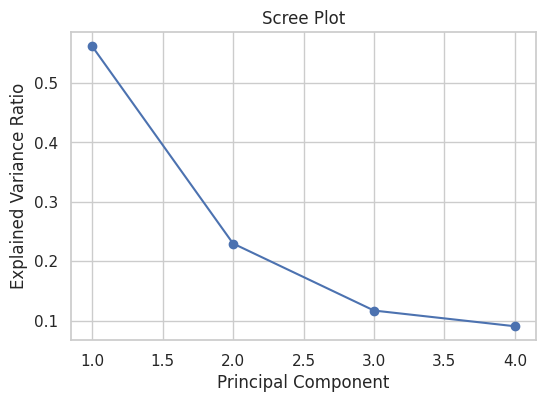

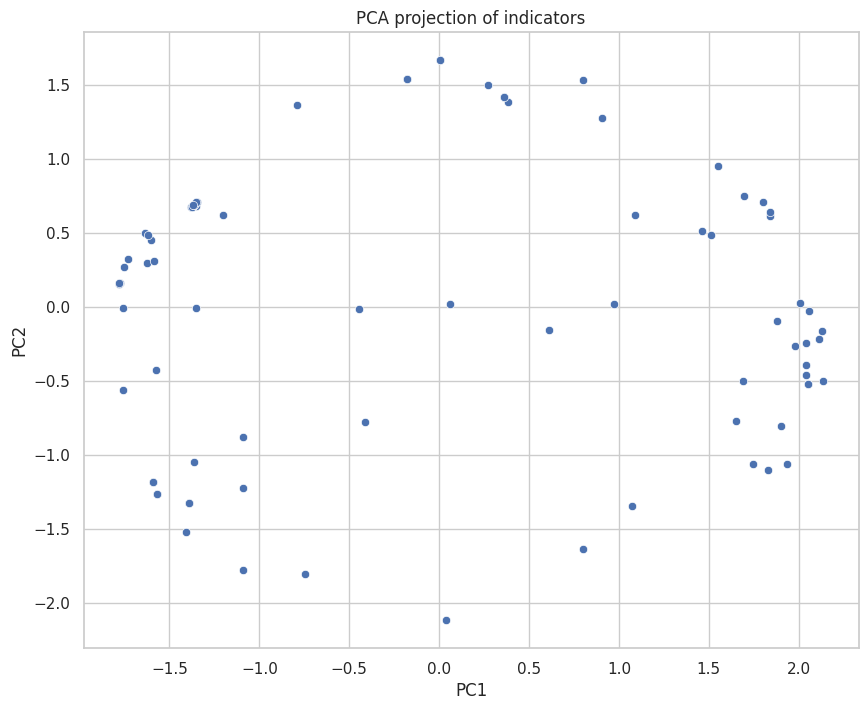

In [22]:
# Scree plot
plt.figure(figsize=(6,4))
plt.plot(np.arange(1, len(explained)+1), explained, '-o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.savefig('outputs/scree_plot.png', dpi=200)
plt.show()

# 2D scatter with labels (useful because you have 120 points)
plt.figure(figsize=(10,8))
sns.scatterplot(x=pc_df['PC1'], y=pc_df['PC2'])
plt.xlabel('PC1'); plt.ylabel('PC2'); plt.title('PCA projection of indicators')
plt.savefig('outputs/pca_2d_scatter.png', dpi=200, bbox_inches='tight')
plt.show()


In [23]:
loadings = pd.DataFrame(pca.components_.T, index=df.columns, columns=[f'PC{i+1}' for i in range(4)])
loadings.to_csv('outputs/pca_loadings.csv')
display(loadings)


,PC1,PC2,PC3,PC4
1,,,,
Balochistan,0.280751,0.187248,0.336620,0.756838
KP (Excluding Merged Areas),0.671493,-0.448579,-0.252428,-0.290094
Pakistan,-0.216996,0.056183,0.700363,-0.509164
Punjab,-0.644115,-0.505504,-0.281157,0.224795
Sindh,-0.091132,0.710651,-0.503398,-0.182375


## **Principal Component Analysis (4D)**

In [24]:
pca = PCA(n_components=4)
pca.fit(X_row_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative:", pca.explained_variance_ratio_.cumsum())

loadings = pd.DataFrame(
    pca.components_,
    columns=df.columns,
    index=['PC1','PC2','PC3','PC4']
)
display(loadings)


Explained variance ratio: [0.56189552 0.23002514 0.11725909 0.09082025]
Cumulative: [0.56189552 0.79192065 0.90917975 1.        ]


1,Balochistan,KP (Excluding Merged Areas),Pakistan,Punjab,Sindh
PC1,0.280751,0.671493,-0.216996,-0.644115,-0.091132
PC2,0.187248,-0.448579,0.056183,-0.505504,0.710651
PC3,0.336620,-0.252428,0.700363,-0.281157,-0.503398
PC4,0.756838,-0.290094,-0.509164,0.224795,-0.182375


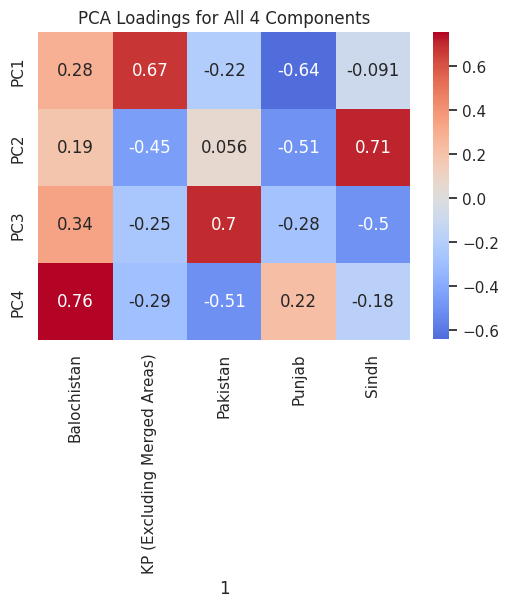

In [25]:
plt.figure(figsize=(6,4))
sns.heatmap(loadings, annot=True, cmap="coolwarm", center=0)
plt.title("PCA Loadings for All 4 Components")
plt.show()


## **Clustering**

---



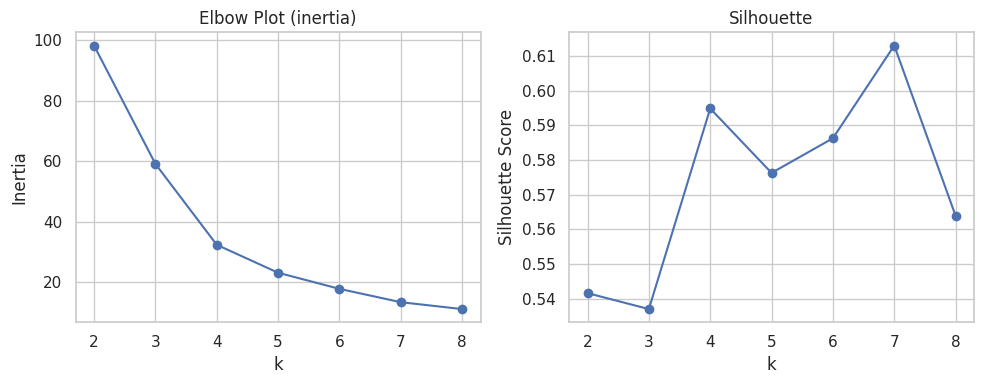

Silhouette scores: {2: np.float64(0.5415695011231402), 3: np.float64(0.5369725490021018), 4: np.float64(0.5948422021672133), 5: np.float64(0.5762569649148745), 6: np.float64(0.5862496508198867), 7: np.float64(0.6130140480845993), 8: np.float64(0.5638851069630842)}


In [26]:
# Prepare data for clustering (use pc features or full scaled data)
# Option A: cluster in PCA space (recommended to denoise): use first 2 or 3 PCs
X_cluster = pca_fit.transform(X_row_scaled.values)[:, :2]   # (120,2)

# Try K from 2..8 and compute silhouette
sil_scores = []
inertia = []
K_range = range(2,9)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = kmeans.fit_predict(X_cluster)
    sil = silhouette_score(X_cluster, labels)
    sil_scores.append(sil)
    inertia.append(kmeans.inertia_)

# plot
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(list(K_range), inertia, '-o')
plt.xlabel('k'); plt.ylabel('Inertia'); plt.title('Elbow Plot (inertia)')
plt.subplot(1,2,2)
plt.plot(list(K_range), sil_scores, '-o')
plt.xlabel('k'); plt.ylabel('Silhouette Score'); plt.title('Silhouette')
plt.tight_layout()
plt.savefig('outputs/cluster_selection.png', dpi=200)
plt.show()

print("Silhouette scores:", dict(zip(K_range, sil_scores)))


In [27]:
k_final = 3
kmeans = KMeans(n_clusters=k_final, random_state=42, n_init=50)
clusters = kmeans.fit_predict(X_cluster)
df_clusters = pd.DataFrame({'indicator': df.index, 'cluster': clusters})
df_clusters.to_csv('outputs/indicator_clusters_kmeans.csv', index=False)


In [28]:
agg = AgglomerativeClustering(n_clusters=k_final, linkage='ward')
agg_labels = agg.fit_predict(X_cluster)
df_clusters['cluster_agg'] = agg_labels
df_clusters.to_csv('outputs/indicator_clusters_both.csv', index=False)


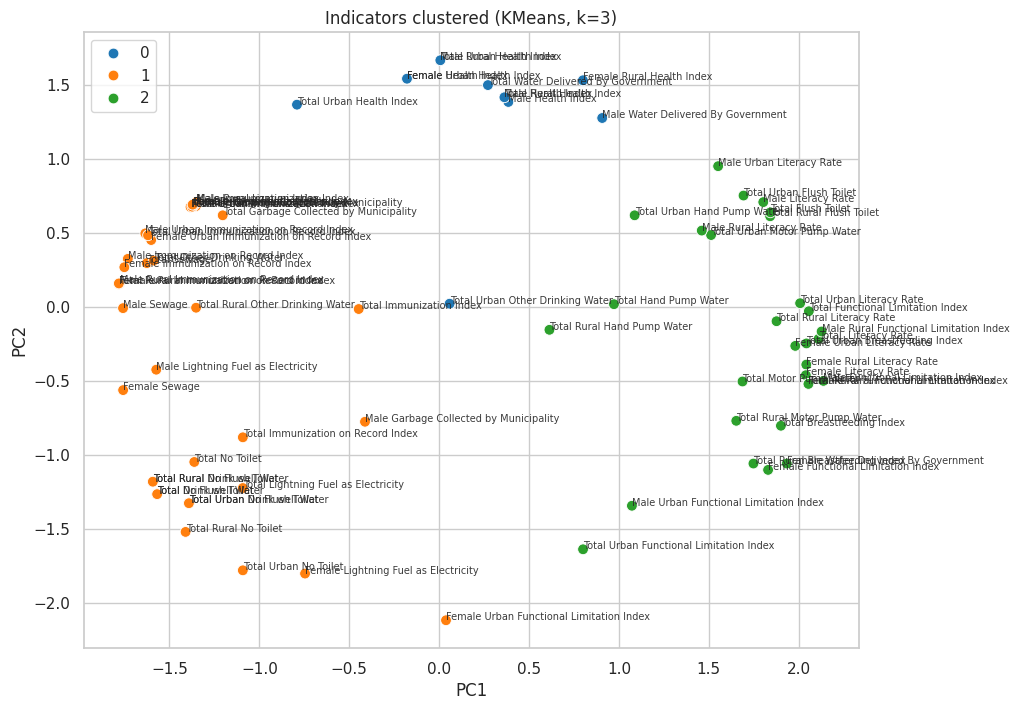

In [29]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=pc_df['PC1'], y=pc_df['PC2'], hue=clusters, palette='tab10', s=60)
for i, idx in enumerate(pc_df.index):
    plt.annotate(idx, (pc_df['PC1'].iloc[i], pc_df['PC2'].iloc[i]), fontsize=7, alpha=0.9)
plt.title(f'Indicators clustered (KMeans, k={k_final})')
plt.savefig('outputs/pca_clusters.png', dpi=200, bbox_inches='tight')
plt.show()


In [30]:
clustered = pd.DataFrame({
    "indicator": df.index,
    "cluster": kmeans.labels_
})

clustered.sort_values("cluster")



,indicator,cluster
11,Total Water Delivered By Government,0
9,Male Water Delivered By Government,0
50,Total Rural Health Index,0
51,Male Health Index,0
46,Female Urban Health Index,0
...,...,...
43,Female Literacy Rate,2
42,Male Literacy Rate,2
41,Total Rural Literacy Rate,2
65,Total Breastfeeding Index,2


In [31]:
# map indicator -> cluster
cluster_map = dict(zip(df_clusters['indicator'], df_clusters['cluster']))

# attach cluster to data
df_with_cluster = df.copy()
df_with_cluster['cluster'] = df_with_cluster.index.map(cluster_map)

# compute cluster means (original percentages)
cluster_summary = df_with_cluster.groupby('cluster').mean()
cluster_summary.to_csv('outputs/cluster_summary_means.csv')
display(cluster_summary)

# also display top indicators per cluster (e.g., those with highest z-score within cluster)
from scipy.stats import zscore
zs = df.div(df.mean(axis=1), axis=0)  # alternative simple ratio


1,Balochistan,KP (Excluding Merged Areas),Pakistan,Punjab,Sindh
cluster,,,,,
0,15.005833,11.170833,13.652500,10.325833,15.393333
1,42.986667,14.235897,55.456923,61.782051,53.040000
2,45.460667,49.002667,40.681333,33.198000,42.805333


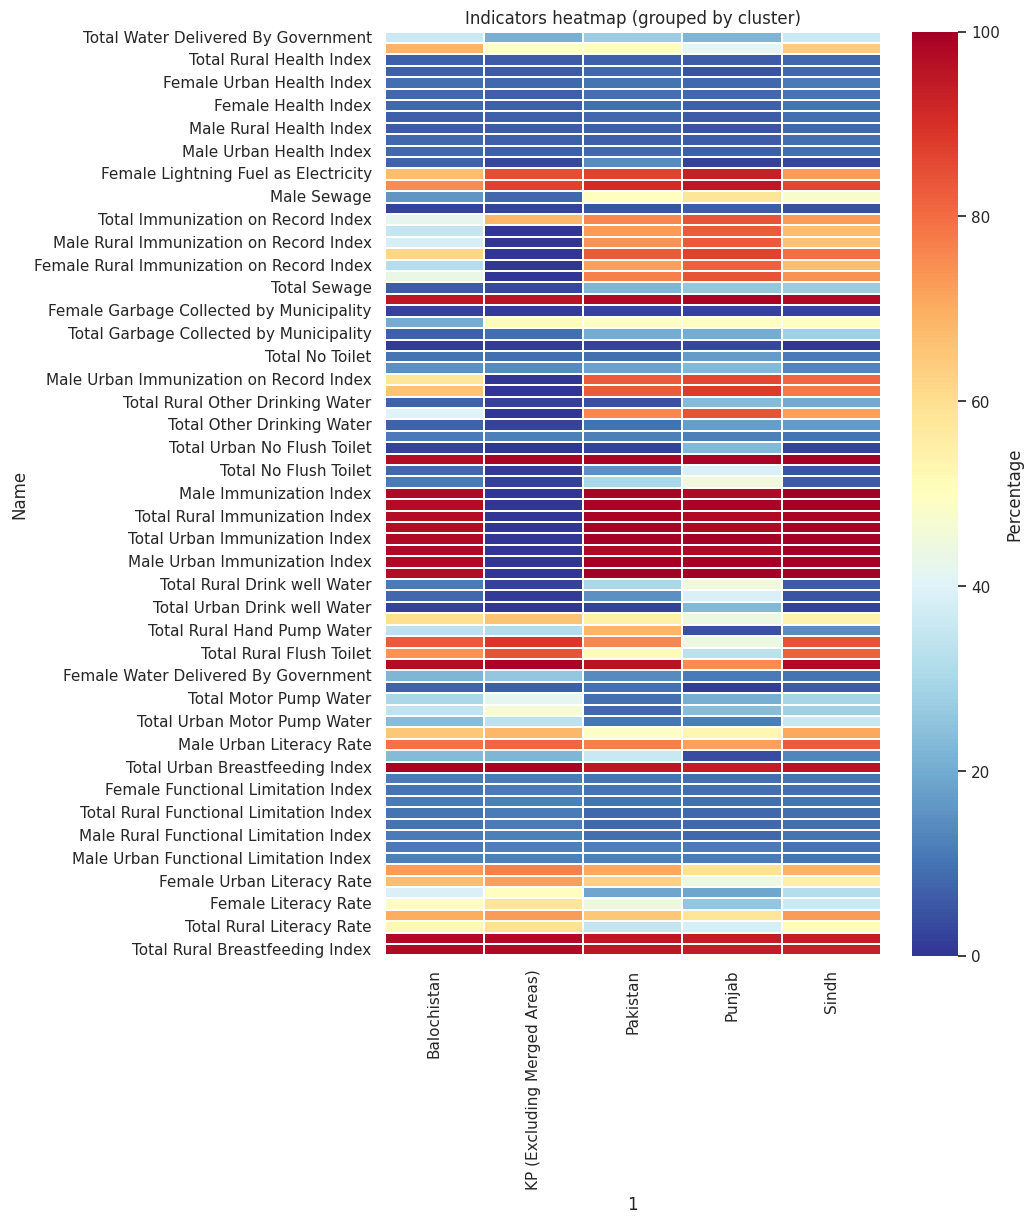

In [32]:
# sort by cluster for a clear heatmap
order = df_with_cluster.sort_values('cluster').index
plt.figure(figsize=(8,12))
sns.heatmap(df.loc[order], cmap='RdYlBu_r', cbar_kws={'label':'Percentage'}, linewidths=0.1)
plt.title('Indicators heatmap (grouped by cluster)')
plt.savefig('outputs/heatmap_clusters.png', dpi=200, bbox_inches='tight')
plt.show()


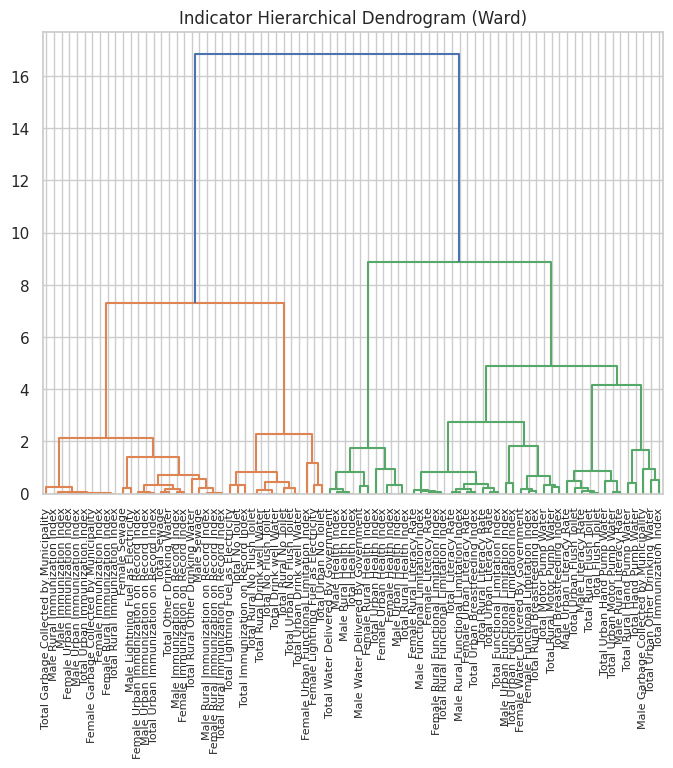

In [33]:
import scipy.cluster.hierarchy as sch
linkage = sch.linkage(X_cluster, method='ward')
plt.figure(figsize=(8,6))
dn = sch.dendrogram(linkage, labels=df.index, leaf_rotation=90, leaf_font_size=8)
plt.title('Indicator Hierarchical Dendrogram (Ward)')
plt.savefig('outputs/dendrogram.png', dpi=200, bbox_inches='tight')
plt.show()
